# Hello to scikit-learn

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Hello world - Linear fit (Linear Regression)

In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
# initialize the model/classifier 
model = LinearRegression()

In [4]:
model?

In [5]:
print(model)

LinearRegression()


In [6]:
# see the hyperparameters
model.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

In [7]:
print(model.fit_intercept)

True


In [8]:
# Create some dummy data
x = np.arange(10.)
y = 2. * x + 1. + 2*np.random.randn(10)
print(x)
print(y)

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
[ 0.87919913  2.7886945   7.02627102  6.75234157 11.06903295  8.94246195
 12.88546785 17.45051846 18.38753889 21.31264033]


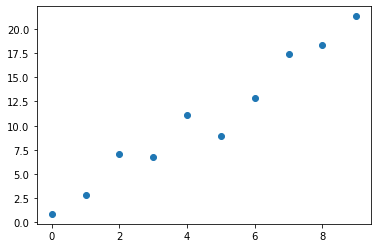

In [9]:
plt.plot(x, y, 'o');

In [10]:
# The input data for sklearn is 2D: (samples == 10 x features == 1)
X = x[:, np.newaxis]
print(X)
print(y)

[[0.]
 [1.]
 [2.]
 [3.]
 [4.]
 [5.]
 [6.]
 [7.]
 [8.]
 [9.]]
[ 0.87919913  2.7886945   7.02627102  6.75234157 11.06903295  8.94246195
 12.88546785 17.45051846 18.38753889 21.31264033]


In [11]:
# fit the model on our data
model.fit(X, y)

LinearRegression()

In [12]:
# underscore at the end indicates a fit parameter,
# each estimator can have different parameters
print(model.coef_)
print(model.intercept_)

[2.19082986]
0.8906823015509371


In [13]:
# evaluate/predict unseen
test_data = np.array([3.3, 8.5]).reshape(-1,1)
print(test_data.shape)
y_test_data = model.predict(test_data)
print(y_test_data)

(2, 1)
[ 8.12042083 19.5127361 ]


In [14]:
# evaluate performance
from sklearn.metrics import mean_squared_error
mean_squared_error(y, model.predict(X))

1.7411863597343977

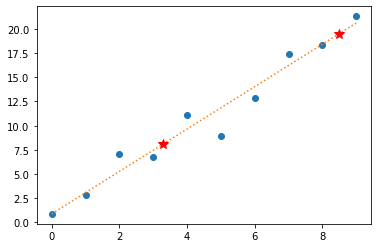

In [15]:
plt.plot(x, y, 'o');
plt.plot(x, model.predict(X),":")
plt.plot(test_data, y_test_data, 'r*', markersize=10)

# Less dummy classification

In [16]:
# hand written digits
from sklearn.datasets import load_digits
digits = load_digits()

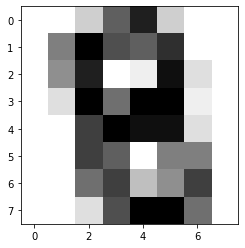

In [17]:
plt.imshow(digits.data[500].reshape(8,8), cmap=plt.cm.binary, interpolation=None)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, random_state=142)

In [19]:
train_test_split?

In [19]:
X_train.shape

(1347, 64)

In [20]:
print(np.bincount(y_train))
print(len(np.unique(y_train)))

[126 134 127 132 135 151 131 141 135 135]
10


In [21]:
from sklearn.svm import LinearSVC

In [22]:
# initialize
svm = LinearSVC()
# fit
svm.fit(X_train, y_train)
# predict/evaluate
y_pred = svm.predict(X_test)

/Users/toast/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [23]:
print(svm.predict(X_train))
print(y_train)

[6 5 0 ... 5 4 1]
[6 5 0 ... 5 4 1]


In [24]:
svm.score(X_train, y_train)

0.9844097995545658

In [25]:
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

Test set score: 0.94


In [26]:
svm.score(X_test, y_test)

0.9355555555555556

In [27]:
# newer version of API
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9355555555555556

In [28]:
from sklearn import metrics
print("accuracy:", metrics.accuracy_score(y_test, y_pred))
print("precision:", metrics.precision_score(y_test, y_pred, average='weighted'))
print("recall:", metrics.recall_score(y_test, y_pred, average='weighted'))
print("f1 score:", metrics.f1_score(y_test, y_pred, average='weighted'))

accuracy: 0.9355555555555556
precision: 0.9367830091163425
recall: 0.9355555555555556
f1 score: 0.9358779602398201


In [29]:
print(metrics.classification_report(y_test, y_pred,
                                    target_names=['%s'%i for i in range(10)]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       0.83      0.90      0.86        48
           2       0.96      0.96      0.96        50
           3       0.88      0.90      0.89        51
           4       0.98      0.96      0.97        46
           5       0.94      0.94      0.94        31
           6       1.00      0.96      0.98        50
           7       0.95      0.97      0.96        38
           8       0.89      0.85      0.87        39
           9       0.93      0.91      0.92        45

    accuracy                           0.94       450
   macro avg       0.94      0.93      0.93       450
weighted avg       0.94      0.94      0.94       450



In [30]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_train, svm.predict(X_train))
print(mat)

[[126   0   0   0   0   0   0   0   0   0]
 [  0 133   0   0   0   0   0   0   0   1]
 [  0   0 127   0   0   0   0   0   0   0]
 [  0   0   0 132   0   0   0   0   0   0]
 [  0   0   0   0 135   0   0   0   0   0]
 [  0   0   0   0   0 150   0   0   0   1]
 [  0   1   0   0   0   0 130   0   0   0]
 [  0   0   0   0   0   0   0 141   0   0]
 [  0  13   1   0   1   0   1   0 117   2]
 [  0   0   0   0   0   0   0   0   0 135]]


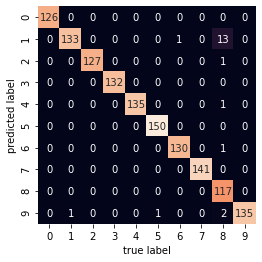

In [31]:
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

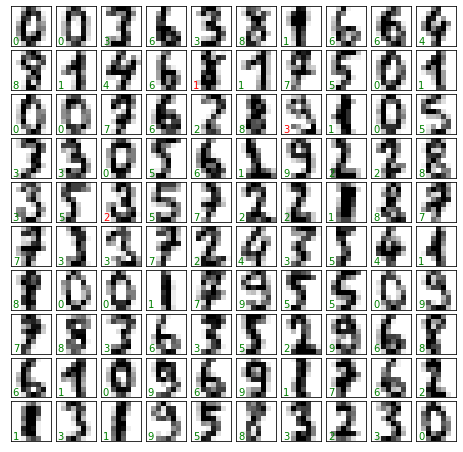

In [32]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(8, 8), cmap='binary')
    ax.text(0.05, 0.05, str(y_pred[i]),
            transform=ax.transAxes,
            color='green' if (y_test[i] == y_pred[i]) else 'red')
    ax.set_xticks([])
    ax.set_yticks([])

# .predict_proba()
Some of the models have a method *predict_proba*, to inspect probabilites of belonging to individual classes.

Use *sklearn.svm.SVC*, check the model doc, and try to see what would be the probabilities of being what number of a randomly generated image

In [33]:
noise = 1.*np.random.choice(16,size=64)
noise.shape

(64,)

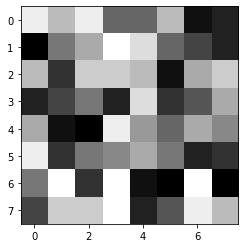

In [34]:
plt.imshow(noise.reshape(8,8), cmap=plt.cm.binary, interpolation=None)

In [35]:
from sklearn.svm import SVC
clf = SVC(probability=True)
clf.fit(X_train, y_train)

SVC(probability=True)

In [36]:
noise_pred = clf.predict(noise[None,:])
print(noise_pred[0])

4


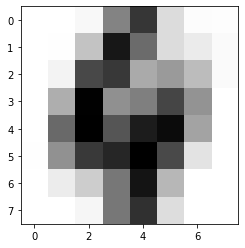

In [37]:
what = np.mean(digits.data[digits.target==noise_pred[0],:], axis=0)
plt.imshow(what.reshape(8,8), cmap=plt.cm.binary, interpolation=None)

<BarContainer object of 10 artists>

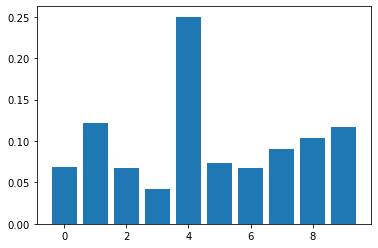

In [38]:
plt.bar(np.arange(10),clf.predict_proba(noise[None,:])[0])